In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tabulate import tabulate
import seaborn as sns
from sklearn import preprocessing
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
import docx
pd.options.display.float_format = '{:,.2f}'.format

In [35]:
data = pd.read_csv("datamodelr.csv")
data.drop("Unnamed: 0",axis=1,inplace=True)
data.drop("UNITID",axis=1,inplace=True)
data.drop("index",axis=1,inplace=True)

In [36]:
data.head()

,TYPE,TUITION1_INDISTRICT_UG,FEE1_INDISTRICT_UG,NUM_APPS_ADMIT,TOTAL_AMOUNT_PELL_TOUG,STATE,TOTAL_SPENT_ACADEMICSUPP,TOTAL_SPENT_STUDENTSS,STATEGRANT,LOCAL_GRANT
0,0,44080,270,12189,4746256,NORTH,14970150,47240166,92335664,234061157
1,0,22500,1500,492,1062947,MidWest,548503,2238376,5690513,14604706
2,1,5002,2311,3570,7951250,SOUTH,11661004,9188368,2436226,0
3,1,4452,2787,20313,36114112,SOUTH,45567386,20070425,24452588,0
4,0,31190,1580,2126,1433360,MidWest,1132752,7868736,17079137,30148961


# Train TEST SPLIT

In [37]:
features = data[['TYPE', 'TUITION1_INDISTRICT_UG', 'FEE1_INDISTRICT_UG', 'TOTAL_AMOUNT_PELL_TOUG', 'STATE',
       'TOTAL_SPENT_ACADEMICSUPP', 'TOTAL_SPENT_STUDENTSS', 'STATEGRANT',
       'LOCAL_GRANT']]
label = data["NUM_APPS_ADMIT"]

In [38]:
X_train,X_test,y_train,y_test = train_test_split(features, label, test_size = 0.30,random_state=1,stratify=features["STATE"])

# Numerical Data 

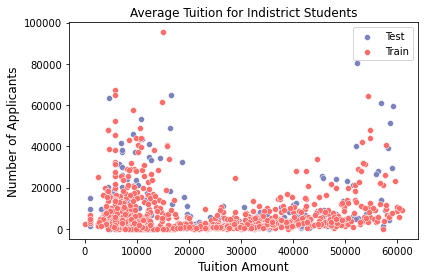

In [39]:
sns.scatterplot(data=testdf, x="TUITION1_INDISTRICT_UG", y="NUM_APPS_ADMIT",color="#7C83BC")

sns.scatterplot(data=traindf, x="TUITION1_INDISTRICT_UG", y="NUM_APPS_ADMIT",color="#FF6D6A")
plt.title("Average Tuition for Indistrict Students",size=12)
plt.xlabel('Tuition Amount',size=12)
plt.ylabel('Number of Applicants',size=12)
plt.legend(["Test", "Train"], loc ="upper right")

plt.show()
#plt.savefig('TuitionNum.png', dpi=300) 

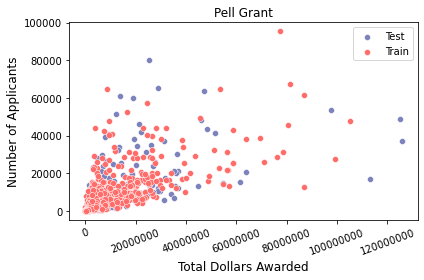

In [40]:
sns.scatterplot(data=testdf, x="TOTAL_AMOUNT_PELL_TOUG", y="NUM_APPS_ADMIT",color="#7C83BC")

sns.scatterplot(data=traindf, x="TOTAL_AMOUNT_PELL_TOUG", y="NUM_APPS_ADMIT",color="#FF6D6A")
plt.title("Pell Grant",size=12)
plt.xlabel('Total Dollars Awarded',size=12)
plt.ylabel('Number of Applicants',size=12)
plt.legend(["Test", "Train"], loc ="upper right")
plt.xticks(rotation=20)
plt.ticklabel_format(style='plain', axis='x')
plt.show()
#plt.savefig('PellNum.png', dpi=300) 


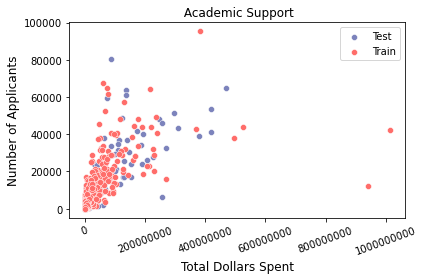

In [41]:

sns.scatterplot(data=testdf, x="TOTAL_SPENT_ACADEMICSUPP", y="NUM_APPS_ADMIT",color="#7C83BC")

sns.scatterplot(data=traindf, x="TOTAL_SPENT_ACADEMICSUPP", y="NUM_APPS_ADMIT",color="#FF6D6A")
plt.title(" Academic Support",size=12)
plt.xlabel('Total Dollars Spent',size=12)
plt.ylabel('Number of Applicants',size=12)
plt.legend(["Test", "Train"], loc ="upper right")
plt.xticks(rotation=20)
plt.ticklabel_format(style='plain', axis='x')
#plt.savefig('ASSNum.png', dpi=300) 
plt.show()

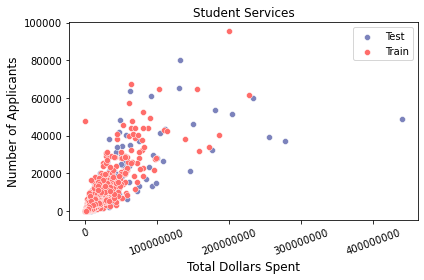

In [42]:
sns.scatterplot(data=testdf, x="TOTAL_SPENT_STUDENTSS", y="NUM_APPS_ADMIT",color="#7C83BC")

sns.scatterplot(data=traindf, x="TOTAL_SPENT_STUDENTSS", y="NUM_APPS_ADMIT",color="#FF6D6A")
plt.title("Student Services",size=12)
plt.xlabel('Total Dollars Spent',size=12)
plt.ylabel('Number of Applicants',size=12)
plt.legend(["Test", "Train"], loc ="upper right")
plt.xticks(rotation=20)
plt.ticklabel_format(style='plain', axis='x')
#plt.savefig('SsNum.png', dpi=300) 
plt.show()

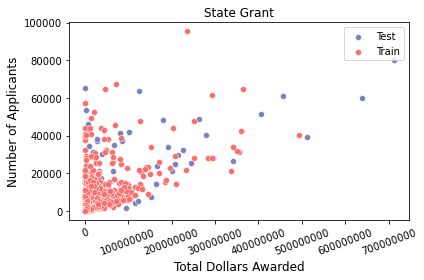

In [43]:
sns.scatterplot(data=testdf, x="STATEGRANT", y="NUM_APPS_ADMIT",color="#7C83BC")

sns.scatterplot(data=traindf, x="STATEGRANT", y="NUM_APPS_ADMIT",color="#FF6D6A")
plt.title("State Grant",size=12)
plt.xlabel('Total Dollars Awarded',size=12)
plt.ylabel('Number of Applicants',size=12)
plt.legend(["Test", "Train"], loc ="upper right")
plt.xticks(rotation=20)
plt.ticklabel_format(style='plain', axis='x')

#plt.savefig('stategrantNum.png', dpi=300) 
plt.show()

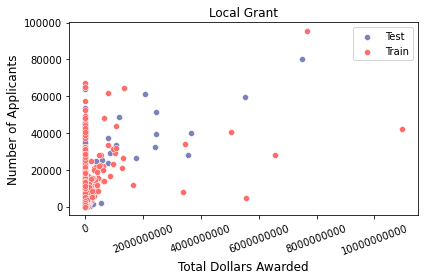

In [44]:

sns.scatterplot(data=testdf, x="LOCAL_GRANT", y="NUM_APPS_ADMIT",color="#7C83BC")

sns.scatterplot(data=traindf, x="LOCAL_GRANT", y="NUM_APPS_ADMIT",color="#FF6D6A")
plt.title("Local Grant",size=12)
plt.xlabel('Total Dollars Awarded',size=12)
plt.ylabel('Number of Applicants',size=12)
plt.legend(["Test", "Train"], loc ="upper right")
plt.xticks(rotation=20)
plt.ticklabel_format(style='plain', axis='x')
#plt.savefig('localgrant.png', dpi=300) 
plt.show()

# Categorical Data 

Sorting Graph 

In [45]:
testdfsorted = testdf.sort_values(by="STATE")
traindfsorted=traindf.sort_values(by="STATE")

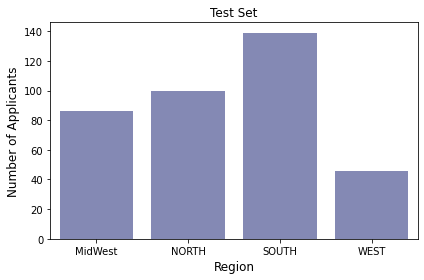

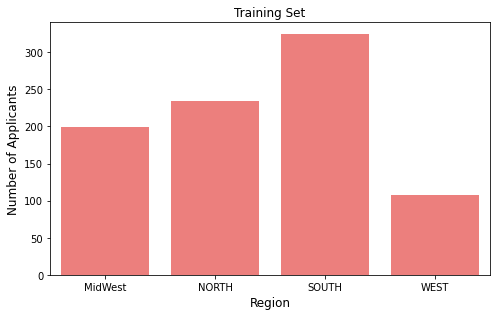

In [46]:
f, axes = plt.subplots(1,1)
plt.rcParams["figure.figsize"] = [7.00, 4.50]
plt.rcParams["figure.autolayout"] = True


sns.countplot(data=testdfsorted, x="STATE",color="#7C83BC")

plt.title("Test Set",size=12)
plt.xlabel('Region',size=12)
plt.ylabel('Number of Applicants',size=12)

plt.show()
#plt.savefig('state1.png', dpi=300) 
sns.countplot(data=traindfsorted, x="STATE",color="#FF6D6A")

plt.title("Training Set",size=12)
plt.xlabel('Region',size=12)
plt.ylabel('Number of Applicants',size=12)


plt.show()

#plt.savefig('state2.png', dpi=300) 

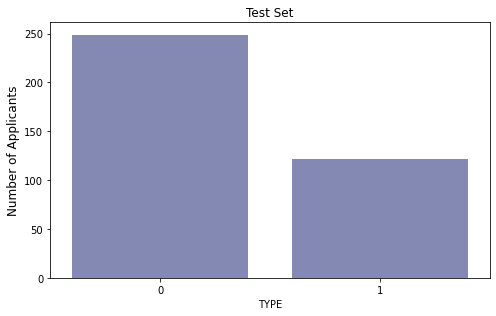

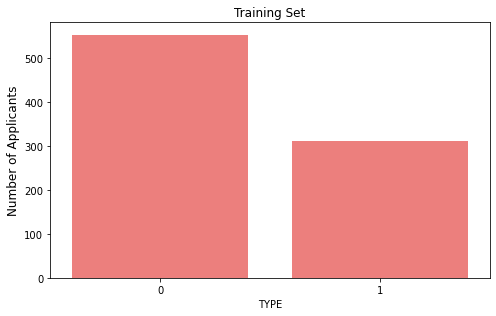

In [47]:
f, axes = plt.subplots(1,1)
plt.rcParams["figure.figsize"] = [7.00, 4.50]
plt.rcParams["figure.autolayout"] = True



sns.countplot(data=testdf, x="TYPE",color="#7C83BC")
plt.title("Test Set",size=12)
plt.ylabel('Number of Applicants',size=12)

#plt.savefig('type2.png', dpi=300) 

plt.show()

sns.countplot(data=traindf, x="TYPE",color="#FF6D6A")
plt.title("Training Set",size=12)
plt.ylabel('Number of Applicants',size=12)


plt.show()
#plt.savefig('type1.png', dpi=300) 

# MODEL

In [48]:
traindf = pd.concat([y_train,X_train],axis=1,sort=False)

In [49]:
testdf = pd.concat([y_test,X_test],axis=1,sort=False)

In [50]:
model1 = sm.OLS.from_formula('NUM_APPS_ADMIT~TYPE+ TUITION1_INDISTRICT_UG+FEE1_INDISTRICT_UG+TOTAL_AMOUNT_PELL_TOUG + STATE+TOTAL_SPENT_ACADEMICSUPP+ TOTAL_SPENT_STUDENTSS+ STATEGRANT+ LOCAL_GRANT', data=traindf)

In [51]:
results1=model1.fit()

In [52]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         NUM_APPS_ADMIT   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     285.5
Date:                Fri, 01 Apr 2022   Prob (F-statistic):          5.16e-277
Time:                        11:47:04   Log-Likelihood:                -8528.6
No. Observations:                 865   AIC:                         1.708e+04
Df Residuals:                     853   BIC:                         1.714e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1179.1521    686.690     -1.717      0.086   -2526.953     168.649
STATE[T.NORTH]             344.5384    461.653      0.746      0.456    -561.571    1250.648
STATE[T.SOUTH]             189.3864    431.618      0.439      0.661    -657.770    1036.543
STATE[T.WEST]              319.2483    571.075      0.559      0.576    -801.629    1440.126
TYPE                      1739.4355    594.558      2.926      0.004     572.467    2906.404
TUITION1_INDISTRICT_UG       0.0154      0.019      0.794      0.427      -0.023       0.053
FEE1_INDISTRICT_UG           0.0033      0.131      0.025      0.980      -0.253       0.260
TOTAL_AMOUNT_PELL_TOUG       0.0002   1.86e-05     13.162      0.000       0.000       0.000
TOTAL_SPENT_ACADEMICSUPP  2.569e-05   3.37e-06      7.627      0.000    1.91e-05    3.23e-05
TOTAL_SPENT_STUDENTSS        0.0002   1.37e-05     15.488      0.000       0.000       0.000
STATEGRANT                2.185e-05   6.31e-06      3.465      0.001    9.47e-06    3.42e-05
LOCAL_GRANT              -5.909e-07   3.69e-07     -1.602      0.110   -1.32e-06    1.33e-07
==============================================================================
Omnibus:                      493.648   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10350.861
Skew:                           2.150   Prob(JB):                         0.00
Kurtosis:                      19.392   Cond. No.                     3.27e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""